In [9]:
# Packages
import h5py
import numpy as np    
import matplotlib.pyplot as plt
from scipy.constants import pi
from scipy.optimize import curve_fit
import func as func

# To quit warnings for showing up in cell outputs:
import warnings
warnings.filterwarnings('ignore')

FIT parameters:
rho_0 = 10000000.0
log(rho_0) = 7.0
r_s = 10.0


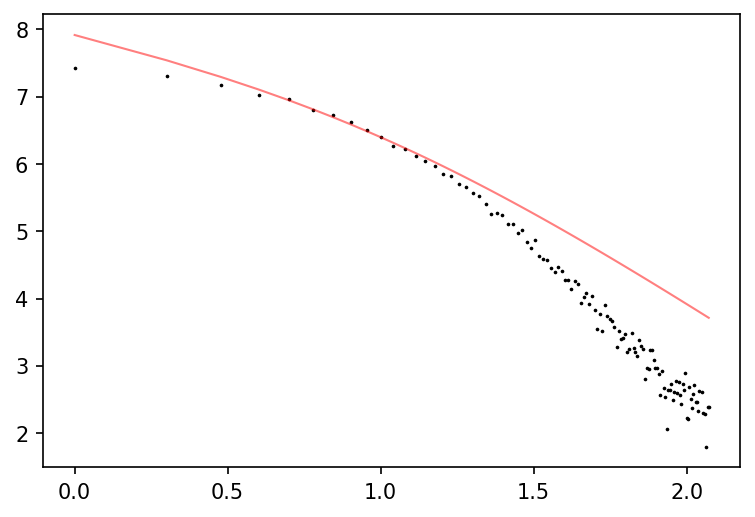

In [8]:
# Directory with data and output filename:
datadir = 'data/hf_rot_n10000/'
filename = 'NFW_hf_rot_n10000.png'
savedir = 'results/nfw/'+filename



# Import data:
f = h5py.File(datadir+"snapshot_027.hdf5", "r")
group = f["PartType1"]
data = group["Coordinates"][()]



# Some parameters:
galx,galy,galz=data[:,0],data[:,1],data[:,2]
galcen=[np.median(galx),np.median(galy),np.median(galz)]     # Galaxy center
mp=(1e11)/(len(galx))                                        # Particle mass
galcoords=[galx,galy,galz]



# Centering coordinates, radial distance to center and :
galcoords=np.array(galcoords) - np.resize(np.array(galcen),(3,1))
galdist = []
for i in range(len(galcoords[0])):
    d=np.sqrt((galcoords[0,i]**2)+(galcoords[1,i]**2)+(galcoords[2,i]**2))
    galdist.append(d)

    

# Density profile:
prof=[],[] 
Rbin=1
Rins=0
Rmax=np.amax(galdist)

for n in range(1,120):
    R1=Rins
    if (R1>Rmax):
        break
    R2=n*Rbin
    Npart=0
    for i in range(len(galdist)):            # Loop that checks for parwticles between both radius and counts them.
        if (galdist[i]>R1 and galdist[i]<R2):
            Npart+=1
    dens=Npart*mp/(1.25*pi*(R2**3-R1**3))
    if dens==0:
        dens=1
    prof[0].append(R1)
    prof[1].append(dens)
    Rins=R2

pos=[]
for i in range(len(prof[1])):
    if prof[1][i]==1:
        pos.append(i)

dens=np.delete(prof[1],pos)
rad=np.delete(prof[0],pos)



# Fitting to NFW:
p0=[10**7,10]
r=rad
popt,pcov=curve_fit(func.NFW,r,dens,p0,sigma=1/r)

logr= np.log10(r)
logdens = np.log10(dens)
logNFW = np.log10(func.NFW(r,popt[0],popt[1]))



# Plotting radial profile and fit:
plt.figure(dpi=150)
plt.plot(logr,logdens,'k.',ms=1.5)
plt.plot(logr,logNFW,'r-',alpha=0.5,linewidth=1)
plt.savefig(savedir)
print("FIT parameters:\n"+"rho_0 = "+str(popt[0])+"\n"+"log(rho_0) = "+str(np.log10(popt[0]))+"\nr_s = "+str(popt[1]))



#end